<a href="https://colab.research.google.com/github/shashi3876/ADIA_Lab_Structural_Break_Challenge/blob/main/EDA_and_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://raw.githubusercontent.com/crunchdao/competitions/refs/heads/master/documentation/badge/open-in-colab.svg)](https://colab.research.google.com/github/crunchdao/quickstarters/blob/master/competitions/structural-break/quickstarters/random-submission/random-submission.ipynb)

#Introduction

This notebook contains the code for EDA and initial visualization of the data for the ADIA Lab Structural Break Challenge. I have manually downloaded the train and test datasets.

In [1]:
import os
import random
import typing

# Import your dependencies
import joblib
import pandas as pd
import sklearn.metrics

Load the data

In [2]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')

In [3]:
X_train.head()

,id,time,value,period
0,0,0,-0.005564,0.0
1,0,1,0.003705,0.0
2,0,2,0.013164,0.0
3,0,3,0.007151,0.0
4,0,4,-0.009979,0.0


In [4]:
X_test.head()

,id,time,value,period
0,10001,0,0.010753,0
1,10001,1,-0.031915,0
2,10001,2,-0.010989,0
3,10001,3,-0.011111,0
4,10001,4,0.011236,0


In [5]:
y_train.head()

,id,structural_breakpoint
0,0,False
1,1,False
2,2,True
3,3,False
4,4,False


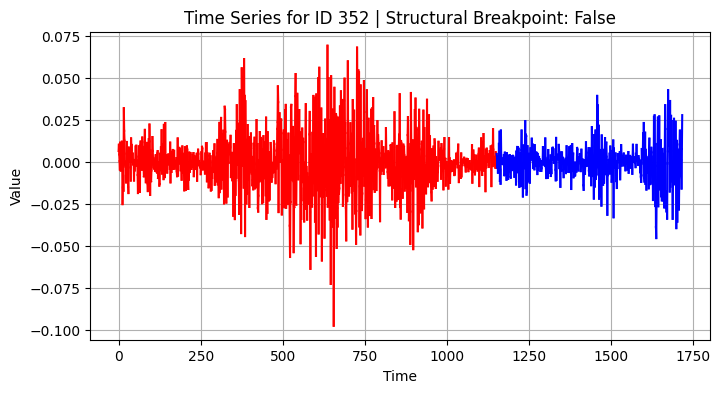

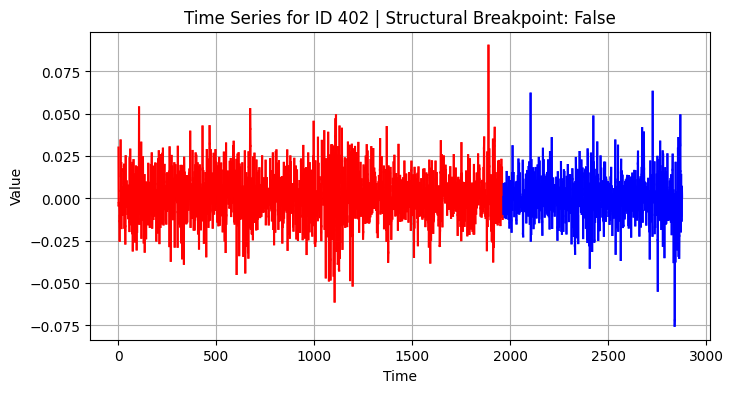

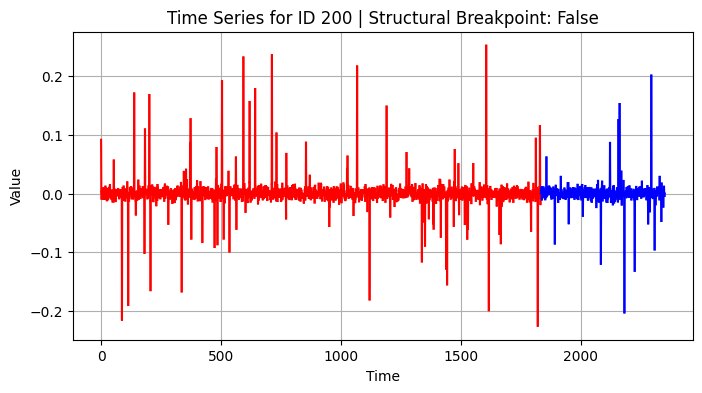

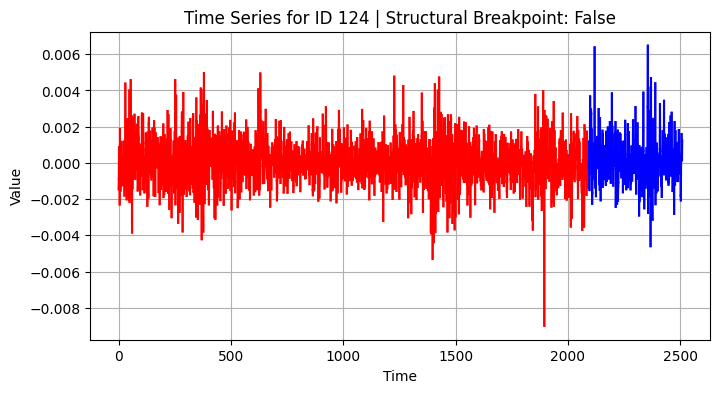

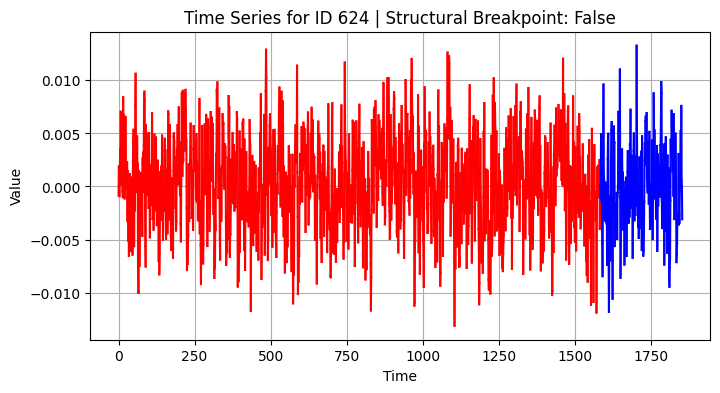

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def plot_random_timeseries(X_train: pd.DataFrame, Y_train: pd.DataFrame):
    # Step 1: Choose a random ID
    random_id = np.random.choice(X_train['id'].unique())

    # Step 2: Filter and sort the time series for the selected ID
    df = X_train[X_train['id'] == random_id].sort_values('time').reset_index(drop=True)

    # Step 3: Get the structural_breakpoint value from Y_train
    breakpoint_value = Y_train.loc[Y_train['id'] == random_id, 'structural_breakpoint'].values[0]

    # Step 4: Plot with different color lines based on the 'period' value
    fig, ax = plt.subplots(figsize=(8, 4))

    # Loop through rows to separate lines by period change
    for i in range(1, len(df)):
        x_vals = [df.loc[i-1, 'time'], df.loc[i, 'time']]
        y_vals = [df.loc[i-1, 'value'], df.loc[i, 'value']]
        color = 'blue' if df.loc[i-1, 'period'] else 'red'
        ax.plot(x_vals, y_vals, color=color)

    ax.set_title(f"Time Series for ID {random_id} | Structural Breakpoint: {breakpoint_value}")
    ax.set_xlabel("Time")
    ax.set_ylabel("Value")
    ax.grid(True)
    plt.show()

for i in range(5):
    plot_random_timeseries(X_train, y_train)

In [15]:
y_train.structural_breakpoint.value_counts()

,count
structural_breakpoint,
False,7092
True,2909
